## Set up

In [1]:
import pickle
import matplotlib.pyplot as plt

## Visualize explained variance of LSI representation

In [2]:
def get_lsi_explained_variance(num_concepts):
    """
    Calculate total explained variance of LSI transformer with corresponding number of concepts
    """
    
    # load LSI transformer
    filepath_in = f'../data/derived/models/transformer_lsi{num_concepts}.pkl'
    lsi = pickle.load(open(filepath_in, 'rb'))
    
    # get explained variance
    explained_variance = lsi.explained_variance_
    
    return explained_variance

In [3]:
def plot_explained_variance_ratio():
    """
    Plot explained variance ratio per component of LSI
    """
    
    # initialize list of number of concepts
    num_concepts_list = [5, 10, 50, 100]
    
    # get explained variance for LSI with corresponding number of concepts
    explained_variance_list = [get_lsi_explained_variance(n) for n in num_concepts_list]
    
    # set style
    plt.style.use('seaborn')
    
    # initialize figure
    fig, axes = plt.subplots(len(num_concepts_list), 1, sharex=True, sharey=True, figsize=(4,8))
    
    # iterate over number of components
    for i in range(len(num_concepts_list)):
        
        # get number of components and explained variance
        num_concepts       = num_concepts_list[i]
        explained_variance = explained_variance_list[i]
        
        # plot variance vs. component
        axes[i].plot(range(1, len(explained_variance)+1), explained_variance, color = f'C{i}')
        
        # add y-axis label
        axes[i].set_ylabel('Explained variance\nper component')
        
    # add x-axis label to last plot
    axes[i].set_xlabel('Number of components')
    
    # save and show figure
    plt.savefig('../data/derived/visualizations/lsi_variance_ratio.png', format='png')
    fig.show()
    
    return None

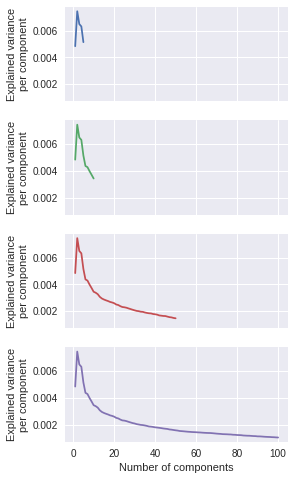

In [4]:
plot_explained_variance_ratio()

In [5]:
def plot_explained_variance_sum():
    """
    Plot total explained variance of LSI against number of concepts per LSI
    """
    # initialize list of number of concepts
    num_concepts_list = [5, 10, 50, 100]
    
    # get sum of explained variance for LSI with corresponding number of concepts
    explained_variance_list = [get_lsi_explained_variance(n).sum() for n in num_concepts_list]
    
    # initialize color list
    color_list = [f'C{i}' for i in range(len(num_concepts_list))]
    
    # initialize figure
    fig, ax = plt.subplots(figsize=(5,4))
    
    # set style
    plt.style.use('seaborn')
    
    # plot explained variance vs. number components
    ax.scatter(num_concepts_list, explained_variance_list, c=color_list)
    
    # add x and y axis labels
    ax.set_ylabel('Total explained variance')
    ax.set_xlabel('Number of components')
    
    # save and show figure
    plt.savefig('../data/derived/visualizations/lsi_variance_total.png', format='png')
    fig.show()

    return None

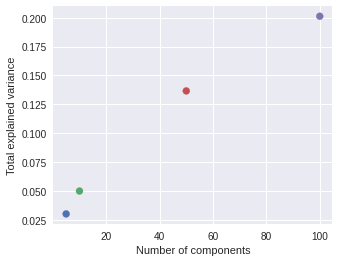

In [6]:
plot_explained_variance_sum()